### 2.1

In [117]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def forward(X, W1, W2):
    Z = np.tanh(np.dot(X, W1.T))
    # print(Z.shape, W2.T.shape)
    y_pred = np.dot(Z, W2.T)
    
    return y_pred, Z

In [98]:
def compute_loss(y_true, y_pred):
    return np.mean(np.power((y_true - y_pred), 2))

In [88]:
def backward(X, y, M, iters, lr):
    N, D = X.shape
    
    W1 = np.random.randn(M, D) * 0.01
    W2 = np.random.randn(1, M) * 0.01
    # print(W1.shape)
    
    error_over_time = []
    
    for i in range(iters):
        idx = np.random.randint(0, N)
        X_sample = X[idx:idx+1]
        y_sample = y[idx:idx+1]
        
        y_pred, Z = forward(X_sample, W1, W2)
        
        loss = compute_loss(y_sample, y_pred)
        error_over_time.append(loss)
        
        dZ2 = y_sample - y_pred  # 1 x 1
        dW2 = np.dot(dZ2, Z)  # (1 x 1) @ (1 x M) = 1 x M
        dZ1 = np.dot(dZ2, W2) * (1 - Z**2)  # (1 x 1) @ (1 x M) * (1 x M) = 1 x M
        dW1 = np.dot(dZ1.T, X_sample)  # (M x 1) @ (1 x D) = M x D
    

        W1 -= lr * dW1
        W2 -= lr * dW2
        
    return W1, W2, np.array(error_over_time)


### 2.2

In [5]:
data = pd.read_csv("./data/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [115]:
X = data.drop(columns=["quality"]).values
y = data["quality"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std # Data Leakage preventation

X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [111]:
M = 30
iters = 1000
learning_rates = [0.00005, 0.0001, 0.0007]

RMSE for learning rate 5e-05: 5.68911094382071


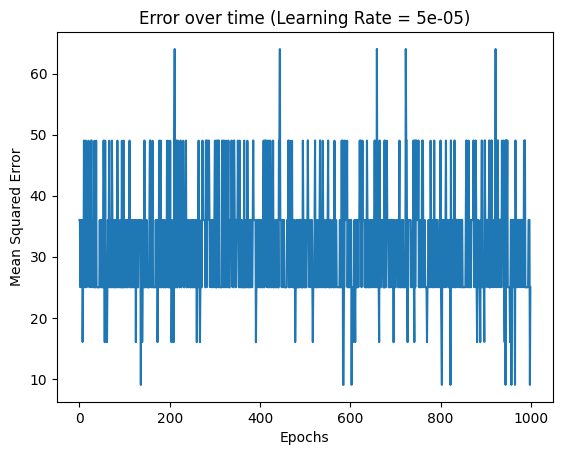

RMSE for learning rate 0.0001: 5.6930097663524775


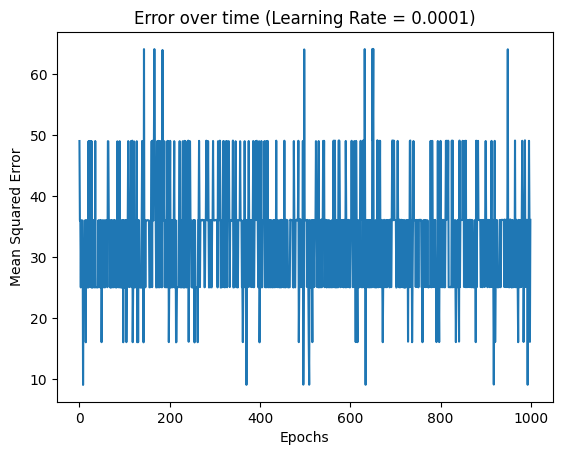

RMSE for learning rate 0.0007: 9.231445405089035


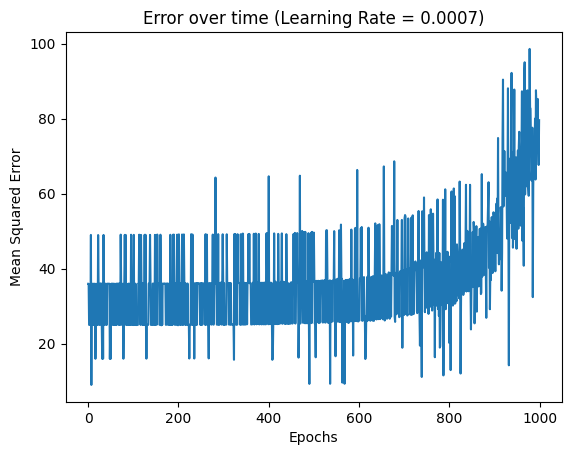

In [116]:
errors_by_lr = {}

for lr in learning_rates:
    W1, W2, error_over_time = backward(X_train, y_train, M, iters, lr)
    
    errors_by_lr[lr] = error_over_time
    
    y_pred, _ = forward(X_test, W1, W2)
    
    rmse = np.sqrt(compute_loss(y_test, y_pred))
    print(f"RMSE for learning rate {lr}: {rmse}")
    plt.figure() 
    plt.plot(error_over_time)
    plt.title(f'Error over time (Learning Rate = {lr})')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.show()
